# 2-5. Pandas 활용 (Time series anaylsis)

## 2-5-1. 자료 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#pd.set_option('max_rows',10) #자료 출력시 최대 10줄만 표시

In [2]:
pd.__version__

'1.3.4'

In [3]:
raw_file = 'KMA_seoul_raw_data2.csv'
seoul = np.genfromtxt(raw_file,encoding='euc-kr', dtype=None, 
                     delimiter=',',
                     names=('loc_num','loc_name','data','conc'),
                     comments='#', skip_header=1)

In [4]:
seoul=seoul[8:56]

In [5]:
seoul

array([(108, '서울', '2009-01', 57), (108, '서울', '2009-02', 81),
       (108, '서울', '2009-03', 59), (108, '서울', '2009-04', 63),
       (108, '서울', '2009-05', 56), (108, '서울', '2009-06', 47),
       (108, '서울', '2009-07', 39), (108, '서울', '2009-08', 31),
       (108, '서울', '2009-09', 39), (108, '서울', '2009-10', 49),
       (108, '서울', '2009-11', 43), (108, '서울', '2009-12', 68),
       (108, '서울', '2010-01', 56), (108, '서울', '2010-02', 47),
       (108, '서울', '2010-03', 60), (108, '서울', '2010-04', 46),
       (108, '서울', '2010-05', 55), (108, '서울', '2010-06', 48),
       (108, '서울', '2010-07', 30), (108, '서울', '2010-08', 33),
       (108, '서울', '2010-09', 27), (108, '서울', '2010-10', 38),
       (108, '서울', '2010-11', 69), (108, '서울', '2010-12', 64),
       (108, '서울', '2011-01', 44), (108, '서울', '2011-02', 74),
       (108, '서울', '2011-03', 67), (108, '서울', '2011-04', 56),
       (108, '서울', '2011-05', 76), (108, '서울', '2011-06', 48),
       (108, '서울', '2011-07', 35), (108, '서울', '2011-08

In [6]:
seoul.shape

(48,)

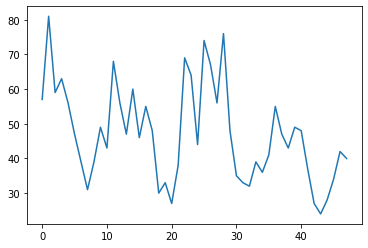

In [7]:
plt.plot(seoul['conc'])

## 2-5-2. 시계열 그리기

In [8]:
dates=pd.date_range('2009-01','2013-01',freq='M') #2009.01~2012.12까지 날짜 변수 생성; 끝값은 포함xx
dates

DatetimeIndex(['2009-01-31', '2009-02-28', '2009-03-31', '2009-04-30',
               '2009-05-31', '2009-06-30', '2009-07-31', '2009-08-31',
               '2009-09-30', '2009-10-31', '2009-11-30', '2009-12-31',
               '2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31', '2010-11-30', '2010-12-31',
               '2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31'],
              dtype='datetime64[ns]', freq='M')

In [9]:
dates.shape

(48,)

In [10]:
SEOUL=pd.Series(seoul['conc'],index=dates) #time Series 생성

In [11]:
SEOUL

2009-01-31    57
2009-02-28    81
2009-03-31    59
2009-04-30    63
2009-05-31    56
2009-06-30    47
2009-07-31    39
2009-08-31    31
2009-09-30    39
2009-10-31    49
2009-11-30    43
2009-12-31    68
2010-01-31    56
2010-02-28    47
2010-03-31    60
2010-04-30    46
2010-05-31    55
2010-06-30    48
2010-07-31    30
2010-08-31    33
2010-09-30    27
2010-10-31    38
2010-11-30    69
2010-12-31    64
2011-01-31    44
2011-02-28    74
2011-03-31    67
2011-04-30    56
2011-05-31    76
2011-06-30    48
2011-07-31    35
2011-08-31    33
2011-09-30    32
2011-10-31    39
2011-11-30    36
2011-12-31    41
2012-01-31    55
2012-02-29    47
2012-03-31    43
2012-04-30    49
2012-05-31    48
2012-06-30    37
2012-07-31    27
2012-08-31    24
2012-09-30    28
2012-10-31    34
2012-11-30    42
2012-12-31    40
Freq: M, dtype: int32

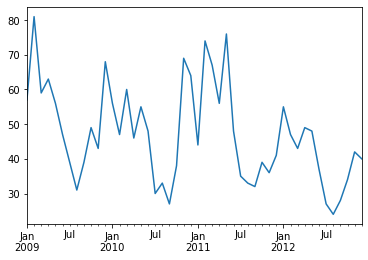

In [12]:
SEOUL.plot() #또는 plt.plot(SEOUL)
plt.show()

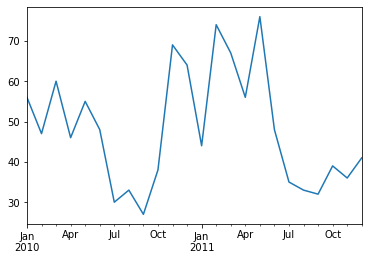

In [13]:
#일부기간만 그리기
SEOUL['2010':'2011'].plot()
plt.show()

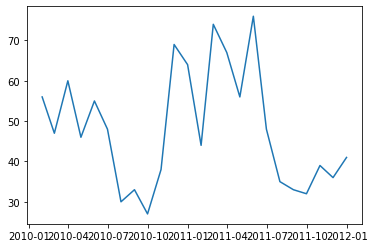

In [14]:
plt.plot(SEOUL['2010':'2011'])

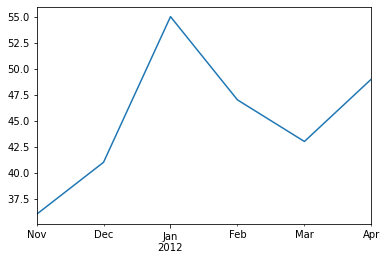

In [15]:
SEOUL['2011-11':'2012-04'].plot()
plt.show()

### 2-5-2-1. 시계열 자료의 인덱싱과 슬라이싱

In [16]:
SEOUL[20] #기존의 인덱싱 방법, 20번째 줄의 값 입력

27

In [17]:
SEOUL['2012-12'] #날짜(연-월)를(을) 이용한 인덱싱

2012-12-31    40
Freq: M, dtype: int32

In [18]:
SEOUL['2012'] #특정 한 해의 자료만 뽑기

2012-01-31    55
2012-02-29    47
2012-03-31    43
2012-04-30    49
2012-05-31    48
2012-06-30    37
2012-07-31    27
2012-08-31    24
2012-09-30    28
2012-10-31    34
2012-11-30    42
2012-12-31    40
Freq: M, dtype: int32

In [19]:
SEOUL[SEOUL>40] #PM10 농도가 40ug/m3 보다 큰 경우만 출력

2009-01-31    57
2009-02-28    81
2009-03-31    59
2009-04-30    63
2009-05-31    56
2009-06-30    47
2009-10-31    49
2009-11-30    43
2009-12-31    68
2010-01-31    56
2010-02-28    47
2010-03-31    60
2010-04-30    46
2010-05-31    55
2010-06-30    48
2010-11-30    69
2010-12-31    64
2011-01-31    44
2011-02-28    74
2011-03-31    67
2011-04-30    56
2011-05-31    76
2011-06-30    48
2011-12-31    41
2012-01-31    55
2012-02-29    47
2012-03-31    43
2012-04-30    49
2012-05-31    48
2012-11-30    42
dtype: int32

## 2-5-3. DataFrame 활용 (다중 자료 처리)

In [20]:
raw_file = 'KMA_baeng_raw_data.csv'
baeng = np.genfromtxt(raw_file,encoding='euc-kr',dtype=None,
                      delimiter=',',
                      names=('loc_num','loc_name','date','conc'),
                      comments='#',skip_header=1)

In [21]:
baeng[12:60]

array([(102, '백령도', '2009-01', 40), (102, '백령도', '2009-02', 74),
       (102, '백령도', '2009-03', 73), (102, '백령도', '2009-04', 57),
       (102, '백령도', '2009-05', 59), (102, '백령도', '2009-06', 38),
       (102, '백령도', '2009-07', 36), (102, '백령도', '2009-08', 41),
       (102, '백령도', '2009-09', 55), (102, '백령도', '2009-10', 44),
       (102, '백령도', '2009-11', 48), (102, '백령도', '2009-12', 54),
       (102, '백령도', '2010-01', 41), (102, '백령도', '2010-02', 35),
       (102, '백령도', '2010-03', 57), (102, '백령도', '2010-04', 45),
       (102, '백령도', '2010-05', 44), (102, '백령도', '2010-06', 29),
       (102, '백령도', '2010-07', 23), (102, '백령도', '2010-08', 23),
       (102, '백령도', '2010-09', 26), (102, '백령도', '2010-10', 28),
       (102, '백령도', '2010-11', 65), (102, '백령도', '2010-12', 58),
       (102, '백령도', '2011-01', 33), (102, '백령도', '2011-02', 54),
       (102, '백령도', '2011-03', 62), (102, '백령도', '2011-04', 51),
       (102, '백령도', '2011-05', 85), (102, '백령도', '2011-06', 25),
       (102, '백령도', '2011

In [22]:
baeng=baeng[12:60]
dates = pd.date_range('2009-01','2013-01', freq='M')
BAENG = pd.Series(baeng['conc'], index=dates)
BAENG.index

DatetimeIndex(['2009-01-31', '2009-02-28', '2009-03-31', '2009-04-30',
               '2009-05-31', '2009-06-30', '2009-07-31', '2009-08-31',
               '2009-09-30', '2009-10-31', '2009-11-30', '2009-12-31',
               '2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31', '2010-11-30', '2010-12-31',
               '2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31'],
              dtype='datetime64[ns]', freq='M')

In [23]:
BAENG

2009-01-31    40
2009-02-28    74
2009-03-31    73
2009-04-30    57
2009-05-31    59
2009-06-30    38
2009-07-31    36
2009-08-31    41
2009-09-30    55
2009-10-31    44
2009-11-30    48
2009-12-31    54
2010-01-31    41
2010-02-28    35
2010-03-31    57
2010-04-30    45
2010-05-31    44
2010-06-30    29
2010-07-31    23
2010-08-31    23
2010-09-30    26
2010-10-31    28
2010-11-30    65
2010-12-31    58
2011-01-31    33
2011-02-28    54
2011-03-31    62
2011-04-30    51
2011-05-31    85
2011-06-30    25
2011-07-31    19
2011-08-31    22
2011-09-30    33
2011-10-31    46
2011-11-30    48
2011-12-31    36
2012-01-31    53
2012-02-29    45
2012-03-31    50
2012-04-30    45
2012-05-31    51
2012-06-30    25
2012-07-31    24
2012-08-31    27
2012-09-30    35
2012-10-31    30
2012-11-30    36
2012-12-31    32
Freq: M, dtype: int32

In [24]:
#SEOUL과 BAENG 합치기
PM10 = pd.DataFrame({'SEOUL':SEOUL,'BAENG':BAENG}) #딕셔너리형 DataFrame 생성

In [25]:
PM10

,SEOUL,BAENG
2009-01-31,57,40
2009-02-28,81,74
2009-03-31,59,73
2009-04-30,63,57
2009-05-31,56,59
2009-06-30,47,38
2009-07-31,39,36
2009-08-31,31,41
2009-09-30,39,55
2009-10-31,49,44


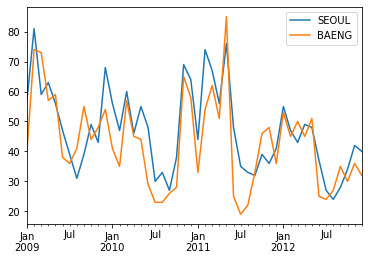

In [26]:
PM10.plot()
plt.show()

### 2-5-3-1. DataFrame 자료 처리

In [27]:
PM10.head()

,SEOUL,BAENG
2009-01-31,57,40
2009-02-28,81,74
2009-03-31,59,73
2009-04-30,63,57
2009-05-31,56,59


In [28]:
PM10['SEOUL'] #PM10.SEOUL 같은 결과 
#PM10 이라는 딕셔너리에서 SEOUL 이라느 Key 호출

2009-01-31    57
2009-02-28    81
2009-03-31    59
2009-04-30    63
2009-05-31    56
2009-06-30    47
2009-07-31    39
2009-08-31    31
2009-09-30    39
2009-10-31    49
2009-11-30    43
2009-12-31    68
2010-01-31    56
2010-02-28    47
2010-03-31    60
2010-04-30    46
2010-05-31    55
2010-06-30    48
2010-07-31    30
2010-08-31    33
2010-09-30    27
2010-10-31    38
2010-11-30    69
2010-12-31    64
2011-01-31    44
2011-02-28    74
2011-03-31    67
2011-04-30    56
2011-05-31    76
2011-06-30    48
2011-07-31    35
2011-08-31    33
2011-09-30    32
2011-10-31    39
2011-11-30    36
2011-12-31    41
2012-01-31    55
2012-02-29    47
2012-03-31    43
2012-04-30    49
2012-05-31    48
2012-06-30    37
2012-07-31    27
2012-08-31    24
2012-09-30    28
2012-10-31    34
2012-11-30    42
2012-12-31    40
Freq: M, Name: SEOUL, dtype: int32

In [29]:
#간단한 사칙연산의 결과를 column으로 출력하기
PM10['DIFF']=PM10['SEOUL']-PM10['BAENG']
PM10.head()

,SEOUL,BAENG,DIFF
2009-01-31,57,40,17
2009-02-28,81,74,7
2009-03-31,59,73,-14
2009-04-30,63,57,6
2009-05-31,56,59,-3


In [30]:
#삭제하기
del PM10['DIFF']
PM10.tail()

,SEOUL,BAENG
2012-08-31,24,27
2012-09-30,28,35
2012-10-31,34,30
2012-11-30,42,36
2012-12-31,40,32


In [31]:
PM10['2011-11':'2012-04'] #시계열 자료의 슬라이싱

,SEOUL,BAENG
2011-11-30,36,48
2011-12-31,41,36
2012-01-31,55,53
2012-02-29,47,45
2012-03-31,43,50
2012-04-30,49,45


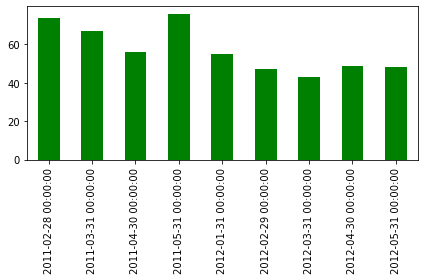

In [32]:
import datetime
PM10.loc[(PM10.SEOUL > 40) & (PM10.BAENG > 40)
        & (PM10.index > datetime.datetime(2011,1,1)),
        'SEOUL'].plot.bar(color='g')

#서울의 PM10 과 백령도의 PM10이 모두 40ug/m3을 넘고 2011년 1월1일이 넘는 날의 SEOUL의 PM10을 나타내어라

plt.tight_layout() #그림이 그림창을 꽉 채우도록 설정
plt.show()

### 2-5-3-2. 통계 처리

In [33]:
PM10.mean()

SEOUL    47.083333
BAENG    42.916667
dtype: float64

In [34]:
PM10.max()

SEOUL    81
BAENG    85
dtype: int32

In [35]:
PM10.min()

SEOUL    24
BAENG    19
dtype: int32

In [36]:
PM10.mean(axis=1) #row의 평균값 산출
#즉 각 월의 SEOUL과 BAENG 의 PM10 평균값

2009-01-31    48.5
2009-02-28    77.5
2009-03-31    66.0
2009-04-30    60.0
2009-05-31    57.5
2009-06-30    42.5
2009-07-31    37.5
2009-08-31    36.0
2009-09-30    47.0
2009-10-31    46.5
2009-11-30    45.5
2009-12-31    61.0
2010-01-31    48.5
2010-02-28    41.0
2010-03-31    58.5
2010-04-30    45.5
2010-05-31    49.5
2010-06-30    38.5
2010-07-31    26.5
2010-08-31    28.0
2010-09-30    26.5
2010-10-31    33.0
2010-11-30    67.0
2010-12-31    61.0
2011-01-31    38.5
2011-02-28    64.0
2011-03-31    64.5
2011-04-30    53.5
2011-05-31    80.5
2011-06-30    36.5
2011-07-31    27.0
2011-08-31    27.5
2011-09-30    32.5
2011-10-31    42.5
2011-11-30    42.0
2011-12-31    38.5
2012-01-31    54.0
2012-02-29    46.0
2012-03-31    46.5
2012-04-30    47.0
2012-05-31    49.5
2012-06-30    31.0
2012-07-31    25.5
2012-08-31    25.5
2012-09-30    31.5
2012-10-31    32.0
2012-11-30    39.0
2012-12-31    36.0
Freq: M, dtype: float64

In [37]:
PM10.mean(axis=0) #default 값

SEOUL    47.083333
BAENG    42.916667
dtype: float64

In [38]:
PM10.describe() #전반적인 통계값 산출

,SEOUL,BAENG
count,48.000000,48.000000
mean,47.083333,42.916667
std,13.992146,15.072637
min,24.000000,19.000000
25%,36.750000,31.500000
50%,46.500000,42.500000
75%,56.000000,53.250000
max,81.000000,85.000000


In [39]:
#DataFrame 멤버간의 상관계수 (correlation coefficient) 도 확인 가능
PM10.corr()

,SEOUL,BAENG
SEOUL,1.000000,0.811758
BAENG,0.811758,1.000000


## 2-5-4. Resampling

In [40]:
PM10_annual=PM10.resample("A").mean()#PM10 시계열 자료에서 연평균 취해서 리샘플 값을 PM10_annual에 저장


In [41]:
PM10_annual

,SEOUL,BAENG
2009-12-31,52.666667,51.583333
2010-12-31,47.750000,39.500000
2011-12-31,48.416667,42.833333
2012-12-31,39.500000,37.750000


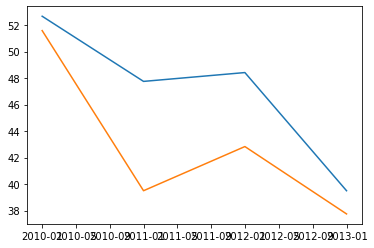

In [42]:
plt.plot(PM10_annual)

<AxesSubplot:>

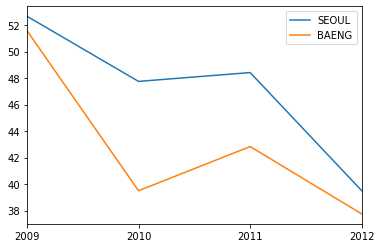

In [43]:
PM10_annual.plot()

<AxesSubplot:>

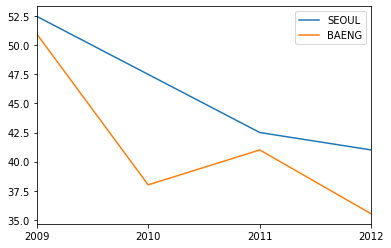

In [44]:
PM10_median=PM10.resample("A").median() #연간 중간값
PM10_median.plot()

In [45]:
PM10_median

,SEOUL,BAENG
2009-12-31,52.5,51.0
2010-12-31,47.5,38.0
2011-12-31,42.5,41.0
2012-12-31,41.0,35.5


<AxesSubplot:>

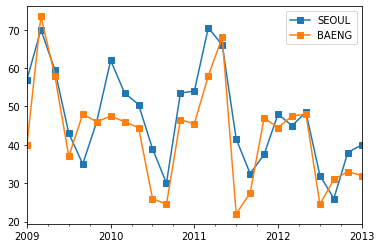

In [47]:
PM10_2m=PM10.resample('2M').mean() #2개월 평균값
PM10_2m.plot(marker='s')

In [48]:
PM10_2m

,SEOUL,BAENG
2009-01-31,57.0,40.0
2009-03-31,70.0,73.5
2009-05-31,59.5,58.0
2009-07-31,43.0,37.0
2009-09-30,35.0,48.0
2009-11-30,46.0,46.0
2010-01-31,62.0,47.5
2010-03-31,53.5,46.0
2010-05-31,50.5,44.5
2010-07-31,39.0,26.0


<AxesSubplot:>

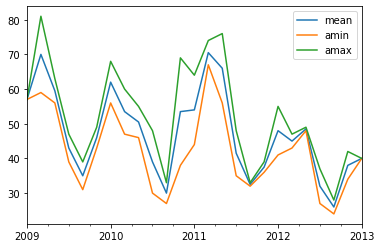

In [49]:
SEOUL_2m=SEOUL.resample('2M').agg(['mean',np.min,np.max]) #격월간 mean,min, max 3열로 resampling
SEOUL_2m['2009':'2013'].plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

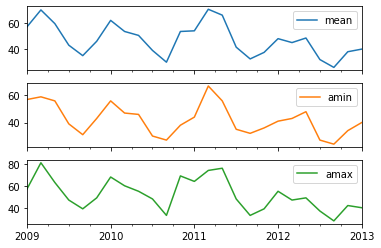

In [50]:
SEOUL_2m['2009':'2013'].plot(subplots=True)